In [ ]:
# 1) Clean the dataset look and study the dataset for this part

# 2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK

# 3) Find Total Sale between two dates entered

# 4) Find each Countries Total SALE to find which Countries is highest potential customer

# 5) Which Customer Id has highest purchase in quantity and total and find out the country of it

# 6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

# 7) Find the biggest order In Sale (Cost) which country was the order from and fiind total purchase (Cost) done by that customer ID

# 8) Find how many different customers are available for each country save the count in dictionary also return countries with highest and lowest customer count

# 9) Find which stock code was ordered the most by each country

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv('/content/Online_Retail.csv')

df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')

print(df)

In [ ]:
df.shape

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df.dropna().shape

In [ ]:
df_cleaned.describe()

In [ ]:
# 1) Clean the dataset look and study the dataset for this part
df_cleaned = df.dropna()
print(df_cleaned)

In [ ]:
# 2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK
# 2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK. Create a bar chart for this
# dictionary_of_mean_wage = {}

# for k in df_cleaned.Countries.value_counts().keys():
#   dictionary_of_mean_quantity[k] = df_cleaned.Quantity[df['Countries'] == k].mean()

# print(dictionary_of_mean_quantity)
# country_stats = df_cleaned.groupby('Countries')['Quantity'].agg(['count','mean'])

# Filter out the UK data
df_filtered = df[df['Country'] != 'United Kingdom']

dictionary_of_mean_quantity = {}
for country in df_filtered['Country'].unique():
    mean_quantity = df_filtered[df_filtered['Country'] == country]['Quantity'].mean()
    dictionary_of_mean_quantity[country] = mean_quantity
sorted_countries = sorted(dictionary_of_mean_quantity.items(), key=lambda x: x[1], reverse=True)[:10]
country_stats = {}
for country, mean_quantity in sorted_countries:
    country_stats[country] = mean_quantity
print(country_stats)

{'Sweden': 112.02727272727273, 'Netherlands': 85.77973568281938, 'Australia': 69.10743801652893, 'Japan': 39.59550561797753, 'Austria': 27.645833333333332, 'Denmark': 26.389830508474578, 'Czech Republic': 23.066666666666666, 'Singapore': 19.482142857142858, 'Hong Kong': 19.0, 'Norway': 18.712264150943398}


In [ ]:
# 2)  Create a bar chart for this using matplot

import matplotlib.pyplot as plt

countries = list(country_stats.keys())
mean_quantities = list(country_stats.values())

plt.bar(countries, mean_quantities, color='Red')

plt.xlabel('Country')
plt.ylabel('Mean Quantity')
plt.title('Top 10 Countries by Mean Quantity (Excluding UK)')

plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# 3) Find Total Sale between two dates entered

import pandas as pd
df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')
df_cleaned = df.dropna()
# Created a copy because it was showing error
df_cleaned_copy = df_cleaned.copy()

# covenrting to date type
df_cleaned_copy['InvoiceDate'] = pd.to_datetime(df_cleaned_copy['InvoiceDate'])

# start date and end date
start_date = pd.to_datetime('2012-01-10 08:26:00 AM')
end_date = pd.to_datetime('2012-10-01 08:26:00 AM')

filtered_df = df_cleaned_copy[(df_cleaned_copy['InvoiceDate'] >= start_date) & (df_cleaned_copy['InvoiceDate'] <= end_date)]

# getting the sum of quantity
total_quantity = filtered_df['Quantity'].sum()

print(total_quantity)

In [ ]:
# 3) Find Total Sale between two dates entered
# 3) show a line chart for this

import matplotlib.pyplot as plt

# Group data by date and sum the quantities
daily_quantity = df_cleaned_copy[(df_cleaned_copy['InvoiceDate'] >= start_date) &
                                  (df_cleaned_copy['InvoiceDate'] <= end_date)].groupby(df_cleaned_copy['InvoiceDate'].dt.date)['Quantity'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_quantity.index, daily_quantity.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the line chart
plt.show()


In [ ]:
# 4) Find each Countries Total SALE to find which Countries is highest potential customer

# Assuming df is your DataFrame with the provided columns

# Calculate total sale for each country
total_sale_by_country = df.groupby('Country')['Quantity'].sum()

# Finding the country with the highest total sale
highest_sale_country = total_sale_by_country.idxmax()
highest_sale_value = total_sale_by_country.max()

print("Total sale by country list")
print(total_sale_by_country)
print(highest_sale_country,"with a total sale of ", highest_sale_value)


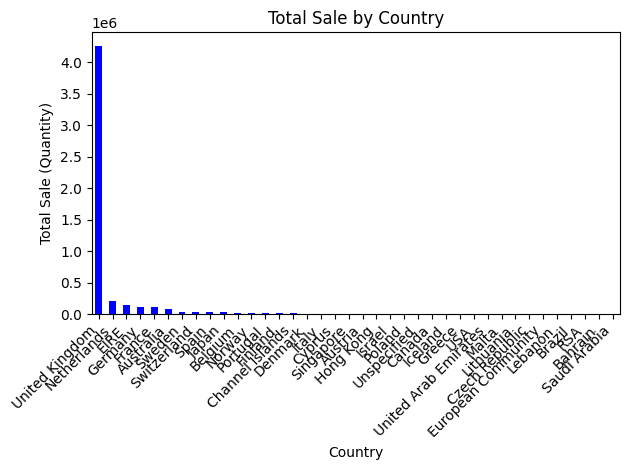

In [ ]:
# 4) Find each Countries Total SALE to find which Countries is highest potential customer
# Find each Countries Total SALE to find which Countries is highest potential customer do a bar chat
# for this sale on y axis and countries on x axis

import matplotlib.pyplot as plt

# Calculating the total sale for each country
total_sale_by_country = df.groupby('Country')['Quantity'].sum()

# Finding the country with the highest total sale
highest_sale_country = total_sale_by_country.idxmax()
highest_sale_value = total_sale_by_country.max()

#creating the cahrt
plt.figure()
total_sale_by_country.sort_values(ascending=False).plot(kind='bar', color='blue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Sale (Quantity)')
plt.title('Total Sale by Country')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# 5) Which Customer Id has highest purchase in quantity and total and find out the country of it

df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')

# Using aggregate method for the first time here
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']
total_purchase_by_customer = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPurchase': 'sum'})

highest_purchased_customer = total_purchase_by_customer['TotalPurchase'].idxmax()
highest_purchased_quantity = total_purchase_by_customer.loc[highest_purchased_customer]['Quantity']
highest_purchase_total = total_purchase_by_customer.loc[highest_purchased_customer]['TotalPurchase']

# fiding the country
highest_purchase_country = df[df['CustomerID'] == highest_purchased_customer]['Country'].values[0]

print("CustomerID : " , highest_purchased_customer)
print("Total Quantity : ", highest_purchased_quantity)
print("Total Amount : ", highest_purchase_total)
print("Country : ", highest_purchase_country)


In [ ]:
# 6) Which Customer Id has lowest purchase in quantity and total and find out the country of it
import pandas as pd

df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')

df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']

# Code to nothhave anything negative
df_filtered = df[(df['Quantity'] >= 0) & (df['TotalPurchase'] >= 0)]

# Calculate total purchase by Customer id
total_purchase_by_customer = df_filtered.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPurchase': 'sum'
})

lowest_purchase_by_customer = total_purchase_by_customer.loc[total_purchase_by_customer['TotalPurchase'].idxmin()]

lowest_purchase_customer = lowest_purchase_by_customer.name
lowest_purchase_quantity = lowest_purchase_by_customer['Quantity']
lowest_purchase_total = lowest_purchase_by_customer['TotalPurchase']

lowest_purchase_country = df[df['CustomerID'] == lowest_purchase_customer]['Country'].values[0]

print("Customer ID : ", lowest_purchase_customer)
print("Total Quantity : ", lowest_purchase_quantity)
print("Total Amount : ", lowest_purchase_total)
print("Country : ", lowest_purchase_country)

In [ ]:
# 7) Find the biggest order In Sale (Cost) which country was the order from and fiind total purchase (Cost) done by that customer ID
df = pd.read_csv('/content/Online_Retail.csv', encoding="latin1")

# Find the biggest order in terms of sale cost and the country it was from
biggest_order = df.loc[df['Quantity'].idxmax()]
biggest_order_country = biggest_order['Country']
biggest_order_total_purchase = biggest_order['Quantity'] * biggest_order['UnitPrice']
customer_id_biggest_order = biggest_order['CustomerID']

# Find the total purchase (cost) done by that customer ID
total_purchase_by_customer_biggest_order = total_purchase_by_customer.loc[customer_id_biggest_order]['Quantity'] * df['UnitPrice']

print("Biggest Costy")
print("Total Cost for the order: " , biggest_order_total_purchase)
print("Country : ", biggest_order_country)
print("CustomerID for the one who has the largest order: ", customer_id_biggest_order)
print("Total Purchase  by Customer ID ", customer_id_biggest_order, ":", total_purchase_by_customer_biggest_order.sum())


In [ ]:
# 8) Find how many different customers are available for each country save the count in dictionary also return countries with highest and lowest customer count
df = pd.read_csv('/content/Online_Retail.csv', encoding="latin1")

# Calculate the count of different customers for each country
customer_count_by_country = df.groupby('Country')['CustomerID'].nunique().to_dict()

country_highest_customer_count = max(customer_count_by_country, key=customer_count_by_country.get)
highest_customer_count = customer_count_by_country[country_highest_customer_count]

country_lowest_customer_count = min(customer_count_by_country, key=customer_count_by_country.get)
lowest_customer_count = customer_count_by_country[country_lowest_customer_count]

print("Count of Different Customers for Each Country:")
for country, count in customer_count_by_country.items():
    print(country, ':' ,count)

# Print the country with the highest customer count and its count
print("Country with the Highest Customer Count")
print("Country :",country_highest_customer_count)
print("Customer Count : " , highest_customer_count)

# Print the country with the lowest customer count and its count
print("Country with the Lowest Customer Count")
print("Country ", country_lowest_customer_count)
print("Customer Count ", lowest_customer_count)


In [ ]:
# 8) Find how many different customers are available for each country save
# the count in dictionary also return countries with highest and lowest
# customer count do bar chart for customer count. customer count on y axis
# and countries on x axis

# Create a bar chart for customer count
plt.figure(figsize=(12, 6))
plt.bar(customer_count_by_country.keys(), customer_count_by_country.values(), color='skyblue')

plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.title('Customer Count by Country')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# 9) Find which stock code was ordered the most by each country
df = pd.read_csv('/content/Online_Retail.csv', encoding="latin1")

stock_code_count_by_country = df.groupby(['Country', 'StockCode']).size().reset_index(name='Count')

most_ordered_stock_by_country = stock_code_count_by_country.loc[stock_code_count_by_country.groupby('Country')['Count'].idxmax()]

print("Stock Code Ordered the Most by Each Country:")
for index, row in most_ordered_stock_by_country.iterrows():
    print("Country: " + str(row['Country']) + ", Stock Code: " + str(row['StockCode']) + ", Count: " + str(row['Count']))